In [ ]:
#INST 326 - Final Project
#Team 10 - Archa Patel, Nick Bramble, James Nicol, Edison Chen

In [ ]:
#Do minutes played impact points scored?

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf

In [10]:
nba_players = pd.read_csv('nba.csv')

In [14]:
#subset data for a min of 5 variables & max of 10 variables
nba = nba_players[['Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'FG%', '3P%', '2P%', 'PTS']]

,Player,Pos,Age,Tm,G,MP,FG%,3P%,2P%,PTS
0,Alex Abrines,SG,24,OKC,75,15.1,0.395,0.380,0.443,4.7
1,Quincy Acy,PF,27,BRK,70,19.4,0.356,0.349,0.384,5.9
2,Steven Adams,C,24,OKC,76,32.7,0.629,0.000,0.631,13.9
3,Bam Adebayo,C,20,MIA,69,19.8,0.512,0.000,0.523,6.9
4,Arron Afflalo,SG,32,ORL,53,12.9,0.401,0.386,0.413,3.4


In [15]:
#descriptive stats
nba.describe()

,Age,G,MP,FG%,3P%,2P%,PTS
count,500.000000,500.000000,500.000000,497.000000,451.000000,485.000000,500.000000
mean,26.276000,43.880000,18.770200,0.440793,0.306741,0.493144,8.021200
std,4.134975,27.610256,9.355018,0.123182,0.159273,0.120044,5.881504
min,19.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,17.750000,11.300000,0.398000,0.250000,0.444000,3.600000
50%,26.000000,48.500000,18.900000,0.443000,0.336000,0.500000,6.650000
75%,29.000000,71.000000,26.325000,0.493000,0.374000,0.545000,11.500000
max,41.000000,82.000000,36.900000,1.000000,1.000000,1.000000,30.400000


In [18]:
#drop missing values
nba.isnull().sum()
nba1 = nba.dropna()

In [19]:
#checking to see if missing values have been dropped
nba1.isnull().sum()

Player    0
Pos       0
Age       0
Tm        0
G         0
MP        0
FG%       0
3P%       0
2P%       0
PTS       0
dtype: int64

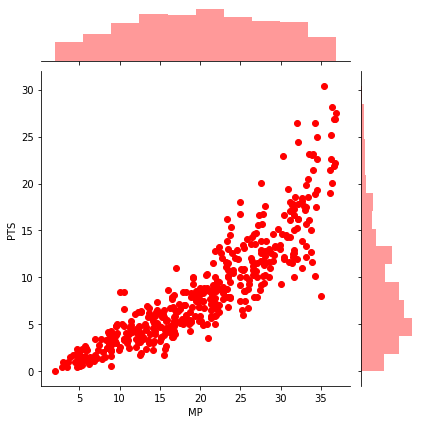

In [76]:
# minutes played * points scored - scatterplot
sns.jointplot(x='MP', y='PTS', data=nba1, color = 'r')

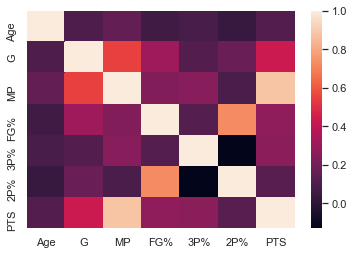

In [87]:
#heatmap - shows which variables are correlated to each other
sns.set()
sns.heatmap(nba1.corr())
#MP & PTS have a correlation value of 0.88

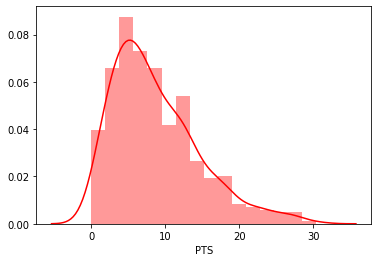

In [73]:
#histogram for points scored
sns.distplot(nba1['PTS'], color = 'r')

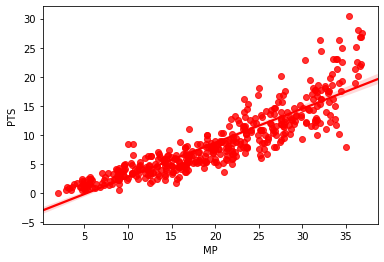

In [75]:
#regression plot
sns.regplot(x='MP', y='PTS', data=nba1, color = 'r')

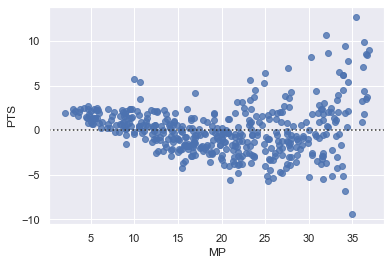

In [88]:
#residuals
sns.residplot(x='MP', y='PTS', data=nba1)

In [33]:
#fitted linear regression using statsmodels package
lm = smf.ols(formula='PTS ~ MP', data=nba1).fit()

#print model summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     1534.
Date:                Wed, 11 Dec 2019   Prob (F-statistic):          4.95e-145
Time:                        09:50:37   Log-Likelihood:                -1066.6
No. Observations:                 439   AIC:                             2137.
Df Residuals:                     437   BIC:                             2145.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.1100      0.329     -9.455      0.0

In [62]:
#coefficients
lm.params

Intercept   -3.109977
MP           0.587483
dtype: float64

In [60]:
#linear regression using scipy package
x = nba1.MP
y = nba1.PTS
stats.linregress(x,y)

LinregressResult(slope=0.5874831121619222, intercept=-3.109976575211272, rvalue=0.8822006933141249, pvalue=4.952164690413338e-145, stderr=0.015000011960488347)

In [61]:
#T-test using scipy package
x = nba1.MP
y = nba1.PTS
stats.ttest_ind(x, y)   

Ttest_indResult(statistic=22.66875716392638, pvalue=6.911029746238457e-90)